# Classificazione Multiclasse - Albero Decisionale


In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import joblib
import os

In [5]:
X_train = pd.read_csv("../data/splitted_category/X_train.csv")
X_test = pd.read_csv("../data/splitted_category/X_test.csv")
y_train = pd.read_csv("../data/splitted_category/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/splitted_category/y_test.csv").values.ravel()


In [6]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',	random_state=42 )

model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [7]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)





def compute_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred, average='weighted'),
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_true, y_pred)
    }

train_metrics = compute_metrics(y_train, y_train_pred)
test_metrics = compute_metrics(y_test, y_test_pred)







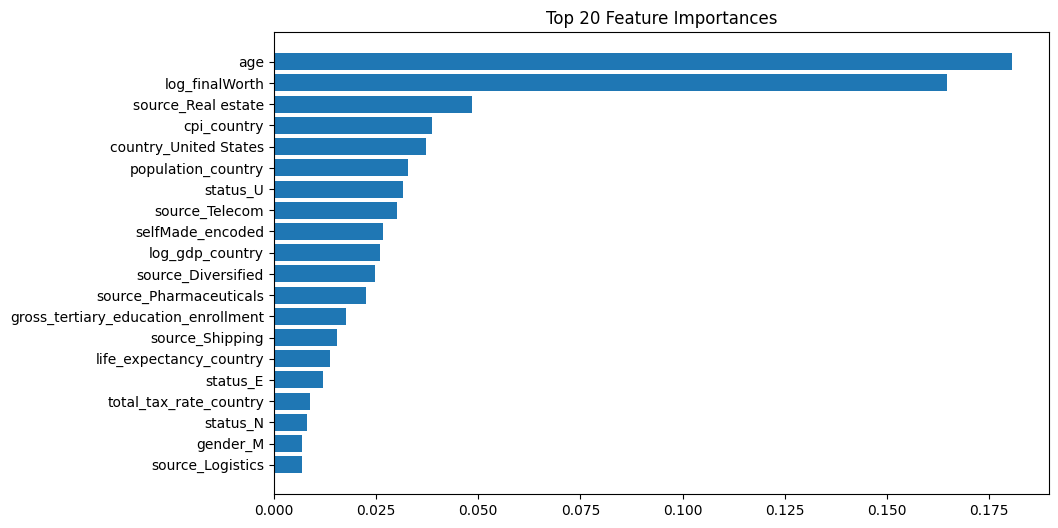

In [8]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_train.columns
sorted_idx = importances.argsort()[::-1][:20]

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], importances[sorted_idx])
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()
plt.savefig("../results/classification_category/DTdefault_top20features.png")
plt.show()


In [9]:
os.makedirs("../results/classification_category", exist_ok=True)

with open("../results/classification_category/decision_tree_metrics_entropy.txt", "w") as f:
    f.write("=== Decision Tree Classifier ===\n\n")
    
    f.write(">>> TRAIN METRICS:\n")
    for k, v in train_metrics.items():
        f.write(f"{k}: {v}\n" if k != "Confusion Matrix" else f"{k}:\n{v}\n")

    f.write("\n>>> TEST METRICS:\n")
    for k, v in test_metrics.items():
        f.write(f"{k}: {v}\n" if k != "Confusion Matrix" else f"{k}:\n{v}\n")

joblib.dump(model, "../models/decision_tree_category_model_entropy.joblib")



['../models/decision_tree_category_model_entropy.joblib']